# Data

In [1]:
import pandas as pd
import hunlp

In [20]:
pents = pd.read_csv("../data/interim/sz_entities_98_17.csv").set_index("Hash")

In [21]:
pents.head()

,Entities
Hash,
6de9c5ec6378e61fe8a65b4683a690ef,"[('Országgyűlés', 'ORG'), ('Országgyűlés', 'OR..."
1b93de398b9309934ab4ab8227d000ea,"[('Tisztelt Ház', 'PER'), ('Uraim', 'PER'), ('..."
1d0ab273b61e3d4e77af113aec03d630,"[('Országgyűlés', 'ORG'), ('Nagy Sándor', 'PER..."
63e621fd4fb78b666a7e3b0f68c0e703,"[('Tisztelt Elnök Úr !', 'ORG'), ('Tisztelt El..."
ff4dbe943a73a473da3ce0bb374fe5ee,[]


In [22]:
ents_df = pd.DataFrame([
    {
        "Hash": hashid, 
        "Entity": entity[0], 
        "EntityCategory": entity[1],
    } 
    for hashid, entities in pents.Entities.iteritems() 
    for entity in eval(entities)
]).set_index("Hash")

In [25]:
ents_df.head(5)

,Entity,EntityCategory
Hash,,
6de9c5ec6378e61fe8a65b4683a690ef,Országgyűlés,ORG
6de9c5ec6378e61fe8a65b4683a690ef,Országgyűlés,ORG
6de9c5ec6378e61fe8a65b4683a690ef,Mádl Ferenc,PER
6de9c5ec6378e61fe8a65b4683a690ef,Országgyűlés,ORG
6de9c5ec6378e61fe8a65b4683a690ef,Vidoven Árpád,PER


In [24]:
raw_df = pd.read_csv(
    "../data/interim/merged_98_17.tsv", 
    sep="\t"
).set_index("Hash").drop(["URL", "Text"], axis=1)
raw_df.Date = pd.to_datetime(raw_df["Date"])

In [27]:
data = raw_df.join(ents_df)

# Queries

In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
data.columns

Index(['Date', 'SpeechType', 'SpeakerType', 'Name', 'Party', 'SpeakerId',
       'Entity', 'EntityCategory'],
      dtype='object')

In [31]:
data[data.Name.str.contains("Orbán Viktor")].SpeechType.value_counts()

napirend előtti felszólalás                        3132
napirend előttihez hozzászólás                     2750
azonnali kérdésre adott miniszteri viszonválasz    1498
kérdést megválaszolja                              1380
felszólalás                                         718
Expozé                                              518
vezérszónoki felszólalás                            293
Előadói válasz                                      139
Eskü                                                115
egyéb felszólalás                                    56
kétperces felszólalás                                35
előterjesztő nyitóbeszéde                            30
interpellációt szóban megválaszolja                  29
nem érdemi felszólalás                                3
Name: SpeechType, dtype: int64

In [33]:
data[data.Name.str.contains("Orbán Viktor")].Entity.value_counts()

Magyarország                              879
Magyarországon                            686
Uraim                                     611
MSZP                                      551
Tisztelt Hölgyeim                         508
Tisztelt Ház                              297
ORBÁN VIKTOR                              286
Fidesz                                    272
Tisztelt Elnök Úr !                       271
Jobbik                                    215
Európai Unió                              207
Magyarországnak                           168
Magyarországot                            151
Európa                                    141
Tisztelt Képviselő Úr !                   126
Európában                                 113
MIÉP                                       92
LMP                                        70
Országgyűlés                               66
SZDSZ                                      64
Házban                                     63
KDNP                              

In [36]:
ov = data[data.Name.str.contains("Orbán Viktor") & 
            ~data.Entity.fillna("").str.contains("Orbán") &
            ~data.Entity.fillna("").str.contains("Fidesz") &
            ~data.Entity.fillna("").str.contains("Tisztelt") &
            ~data.Entity.fillna("").str.contains("Magyarország")
         ]
#           (data.SpeechType == "napirend előtti felszólalás") & 


In [38]:
import datetime

topk = 10

ov98 = ov[(ov.Date < datetime.date(year=2002,month=1,day=1)) &
          (ov.Date > datetime.date(year=1998,month=1,day=1))].Entity.value_counts()[:topk]

ov02 = ov[(ov.Date < datetime.date(year=2006,month=1,day=1)) &
          (ov.Date > datetime.date(year=2002,month=1,day=1))].Entity.value_counts()[:topk]

ov06 = ov[(ov.Date < datetime.date(year=2010,month=1,day=1)) &
          (ov.Date > datetime.date(year=2006,month=1,day=1))].Entity.value_counts()[:topk]

ov10 = ov[(ov.Date < datetime.date(year=2014,month=1,day=1)) &
          (ov.Date > datetime.date(year=2010,month=1,day=1))].Entity.value_counts()[:topk]

ov14 = ov[
#           (ov.Date < datetime.date(year=2014,month=1,day=1)) &
          (ov.Date > datetime.date(year=2014,month=1,day=1))].Entity.value_counts()[:topk]

In [39]:
def comparision_plot(dfs, columns):
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 6)
    data = pd.concat(dfs, axis=1)
    data.columns = columns
    data.plot(kind="bar", ax=ax)
    

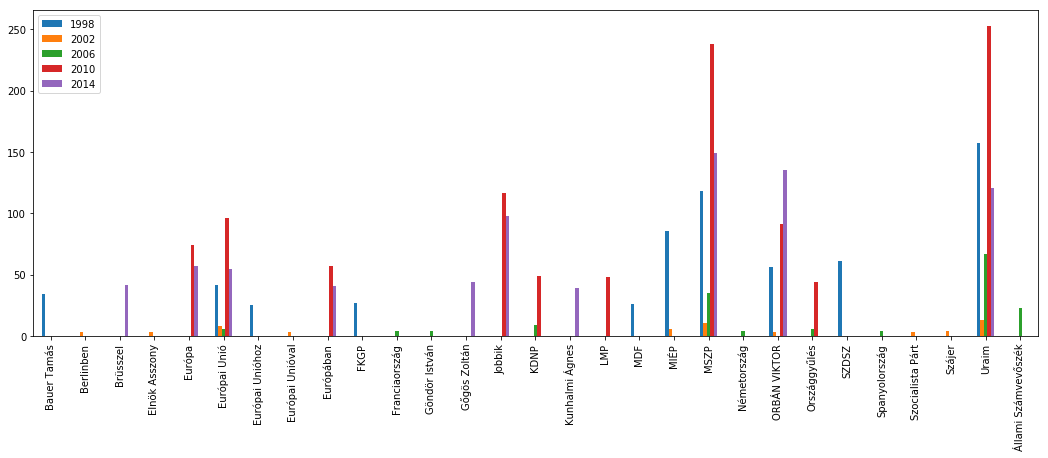

In [40]:
comparision_plot([ov98, ov02, ov06, ov10, ov14], [1998, 2002, 2006, 2010, 2014])